In [ ]:
import nltk
import pandas as pd
from os import getcwd
from zipfile import ZipFile

In [ ]:
with ZipFile("/content/webtext.zip", 'r') as zObject:
           zObject.extractall(path="/content/")

In [ ]:
filePath = f"{getcwd()}/content/webtext"
nltk.data.path.append(filePath)

In [ ]:
from nltk.corpus import webtext

In [ ]:
nltk.download("webtext")
print(nltk.corpus.webtext.words())
webtextcorpus=nltk.Text(nltk.corpus.webtext.words())

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]


In [ ]:
print(len(webtextcorpus)) # total tokens

396733


In [ ]:
#Heap's Law                             # Heap's law tells us the number of words needed (vocabulary of the language / corpus) to model the language sufficiently well.
corpusSize = 0
uniqueTokens = set()
j = 0
dic = {}
for word in webtextcorpus:
    uniqueTokens.add(word)
    corpusSize += 1
    dic[j] = {"Corpus Size": corpusSize, "Unique Tokens": len(uniqueTokens)}
    j = j+1

Vcount_DF =  pd.DataFrame.from_dict(dic, "index")

In [ ]:
Vcount_DF.iloc[:,1]

0             1
1             2
2             3
3             4
4             5
          ...  
396728    21536
396729    21536
396730    21537
396731    21538
396732    21538
Name: Unique Tokens, Length: 396733, dtype: int64

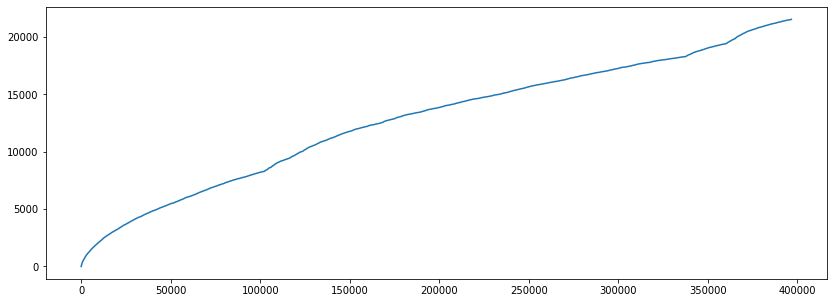

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 5]

plt.plot(Vcount_DF.iloc[:,0], Vcount_DF.iloc[:,1])

In [ ]:
#frequency - n-grams

from collections import Counter
from nltk.util import ngrams
from nltk.probability import FreqDist   # For every unique token, how many times has it occurred in the webtext corpus. The package is used to plot the frequency distribution.


In [ ]:
webtextFD = FreqDist(t.lower() for t in webtextcorpus)    # Note: The total number of unigrams are nothing but the total number of unique tokens
print("unique unigrams in web text corpus-", len(webtextFD))

unique unigrams in web text corpus- 17414


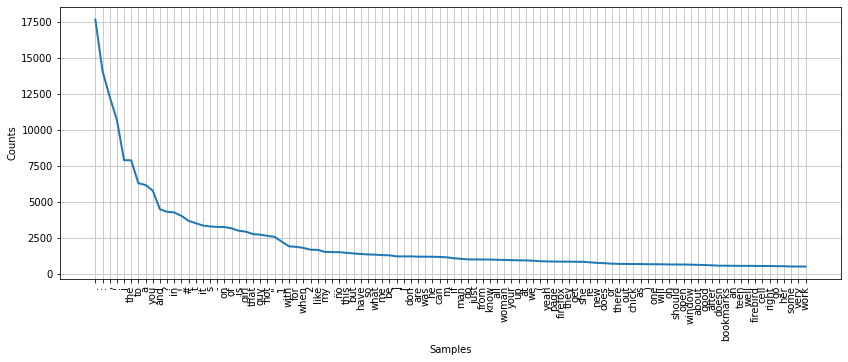

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 5]
webtextFD.plot(100)

unique bigrams in webtext corpus- 148909


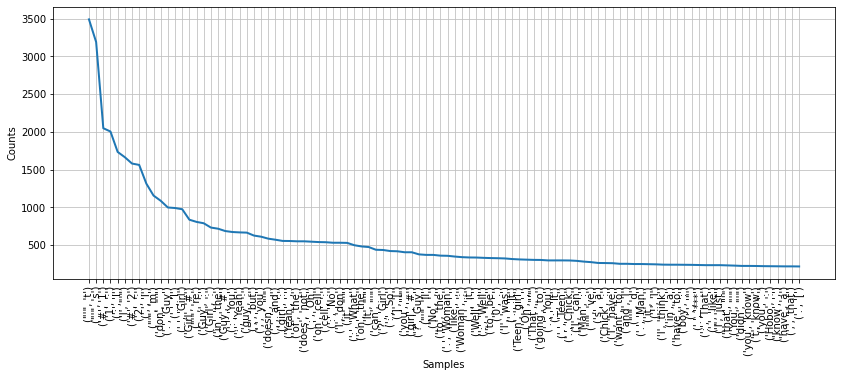

In [ ]:
#plotting bigrams

n = 2
bigrams = ngrams(webtext.words(), n)      # The method ngrams from package ngrams takes in the total words in the corpus and with n = 2, provides the list of bigrams in the corpus
webtext2gram = nltk.FreqDist(token for token in bigrams)
print("unique bigrams in webtext corpus-", len(webtext2gram))
plt.rcParams['figure.figsize'] = [14, 5]
webtext2gram.plot(100)                  # Plotting the top 100 bigrams

unique trigrams in webtext  corpus- 274564


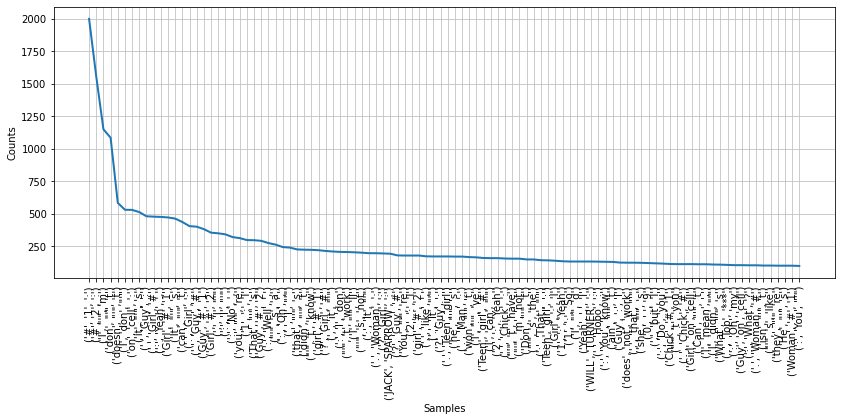

In [ ]:
n = 3
trigrams = ngrams(webtext.words(), n)
webtext3gram = nltk.FreqDist(token for token in trigrams)
print("unique trigrams in webtext  corpus-", len(webtext3gram))
plt.rcParams['figure.figsize'] = [14, 5]
webtext3gram.plot(100)

Building Language Models

In [ ]:
#Unigram Model -- count(w)/total tokens in corpus


def unigramLM(input):
  total_tokens = len(webtextcorpus)
  Prob_input = 1 #0 if log else 1

  for token in nltk.word_tokenize(input):
    count_w = webtextFD[token]
    prob = count_w/total_tokens
    #Prob_input += math.log2(prob)
    print("(", token, ")", count_w, prob)
    Prob_input *= count_w/total_tokens
  return Prob_input


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
input = ["totally nail those" ,"two chicks"]

for phrase in input:
  print("probability of ", phrase, "is ", unigramLM(phrase))

( totally ) 114 0.00028734690585355895
( nail ) 4 1.0082347573809086e-05
( those ) 161 0.0004058144898458157
probability of  totally nail those is  1.175697892615292e-12
( two ) 266 0.0006704761136583042
( chicks ) 12 3.0247042721427257e-05
probability of  two chicks is  2.0279919653519242e-08


In [ ]:
#extracting bigram count

print(webtext2gram[('there', 'are')])
print(webtext2gram[('there', 'is')])
print(webtext2gram[('the', 'the')])
print(webtextFD['there'])

33
63
3
723


In [ ]:
#bigram LM: count(w_{i-1}, w_i)/sum(w_{i-1}) count(there are)/count(there) </s>

def bigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-1):
    countBigram = webtext2gram[(token[i], token[i+1])]
    countBase = web_textFD[token[i+1]]
    if countBase!=0:
      print("(", token[i], token[i+1], ")", countBigram, countBase, countBigram/countBase)
      prob_input *= countBigram/countBase

  return prob_input

In [ ]:
input = ["the data  is ", "you are the"]
#(<s> there),there is, is a, a cat, (cat </s>)
for phrase in input:
  print("probability of ", phrase, "is ", bigramLM(phrase))

( the data ) 0 41 0.0
( data is ) 3 3024 0.000992063492063492
probability of  the data  is  is  0.0
( you are ) 81 1228 0.06596091205211727
( are the ) 28 7909 0.0035402705778227335
probability of  you are the is  0.0002335194762244637


Trigram Model

In [ ]:
  #trigram LM: count(w_{i-2}, w_{i-1}, w_i)/{sum of w in V}c(w_{i-2}, w_{i-1}, w)

def trigramLM(input):
    prob_input = 1
    token = nltk.word_tokenize(input)
    for i in range(len(token)-2):
      counttrigram = webtext3gram[(token[i], token[i+1], token[i+2])]
      countBase = webtext2gram[(token[i], token[i+1])]
      if countBase!=0:
        print("(", token[i], token[i+1], token[i+2], ")", counttrigram,countBase, counttrigram/countBase)
        prob_input *= counttrigram/countBase

    return prob_input

In [ ]:
input = ["Found them?  In Mercea?","The coconut's tropical!"]

for phrase in input:
  print("probability of ", phrase, "is ", trigramLM(phrase))

( Found them ? ) 1 1 1.0
( them ? In ) 1 12 0.08333333333333333
( ? In Mercea ) 1 7 0.14285714285714285
( In Mercea ? ) 1 1 1.0
probability of  Found them?  In Mercea? is  0.011904761904761904
( The coconut 's ) 0 2 0.0
probability of  The coconut's tropical! is  0.0


In [ ]:
#textGeneration- bigram

def textGenerateBigram(start, n):
  punct = [",", "."]
  output= [start]
  while n:
    max= 0
    prevToken = start
    for (token1, token2) in webtext2gram:
      if token2 not in punct:
        if token1.lower()==prevToken.lower() and max< webtext2gram[(token1, token2)]:
          #print(token1, token2, brown2gramFD[(token1, token2)] )
          max = webtext2gram[(token1, token2)]
          start = token2
    n = n-1;
    output.append(start)
  print(output)
  return


In [ ]:
textGenerateBigram('the', 15)

['the', 'same', 'time', 'I', "'", 't', 'know', 'what', "'", 't', 'know', 'what', "'", 't', 'know', 'what']


Smoothing


1.   Laplace Smoothing
2.   Backoff [if you are using lambda, you will require dev set]
3.   Good Turing Estimate



In [ ]:
# shows a certain number of characters before and after every occurrence of a given word
webtextcorpus.concordance("data")

Displaying 25 of 41 matches:
use4 or mouse5 or by clicking mouse3 data in tables automaticlly set to top un
doesn ' t change from " Transferring data from ..." to " Done " after page ref
d link brings up popup window but no data is displayed window is blank . Fleet
art and dl - cancel Downloads a file Data corruption in saved HTML file contai
ity certificates Crash on close with data loss ( bookmarks ) somthing happened
pe Firebird can have " My Favorite " data file like IE . choosing Open in New 
g a file " This document contains no data " error on first Slashdot browse Opt
opment Tracking Seamless Profile and Data Migration Extension Update UI Input 
he bookmarks depending on the meta - data < link ... > Netgear Router MR - 314
 and Settings \< user >\ Application Data . I want to control where these fold
 dialog browser crashes Cannot enter data into forms on secure site Saved pass
 box does not handle large amount of data Unable to access web links in Kopete
). random " The Documen

In [ ]:
#words which occur after "constant" or "spite"
bigramSet = dict()

for t1,t2 in webtext2gram:
    if t1=='constant':
        if (t1, t2) in bigramSet:
            bigramSet[(t1,t2)] = bigramSet[(t1,t2)]+1
        else:
            bigramSet.update({(t1,t2):1})

In [ ]:
sorted(bigramSet.items(), key=lambda x: x[1], reverse=True)

[(('constant', 'reload'), 1),
 (('constant', 'value'), 1),
 (('constant', 'nosebleeds'), 1)]

In [ ]:
print(len(bigramSet)) #unique cases

3


In [ ]:
totalOccurrence = 0

for (t1,t2) in bigramSet:
    totalOccurrence = totalOccurrence + bigramSet[(t1,t2)]

print(totalOccurrence)

3


[(('Nicely', 'set', 'up'), 1), (('set', 'up', 'and'), 1), (('up', 'and', 'needing'), 1), (('and', 'needing', 'a'), 1), (('needing', 'a', 'bit'), 1), (('of', 'time', 'yet'), 1), (('time', 'yet', '.'), 1), (('yet', '.', 'I'), 1), (('feel', 'this', 'hasn'), 1), (('this', 'hasn', "'"), 1), (('t', 'the', 'fineness'), 1), (('the', 'fineness', 'to'), 1), (('fineness', 'to', 'be'), 1), (('be', 'great', 'but'), 1), (('great', 'but', 'it'), 1), (('it', 'is', 'very'), 1), (('is', 'very', 'good'), 1), (('.', '***(*)', '</'), 1), (('***(*)', '</', 'ul'), 1), (('</', 'ul', '>'), 1)]


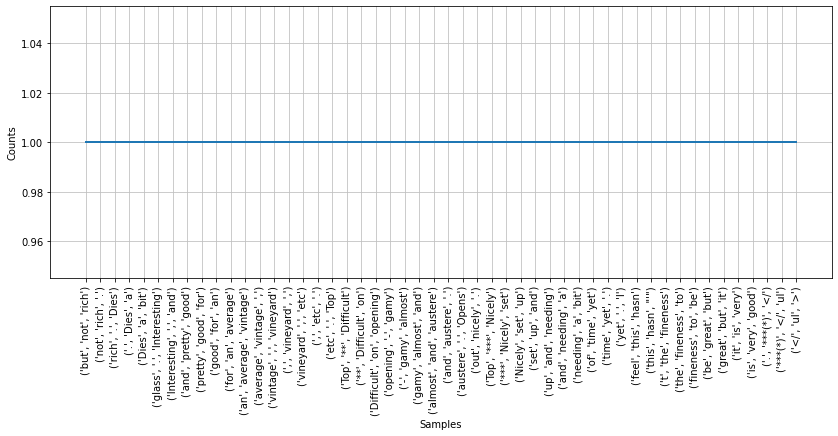

In [ ]:
# infrequent bigrams (last 150)
webtextNgram=ngrams(webtext.words(), n)
webtextNgramFD= nltk.FreqDist(token for token in webtextNgram)
infrequent = FreqDist(dict(webtextNgramFD.most_common()[-50:]))
print(webtextNgramFD.most_common()[-20:])
infrequent.plot()


In [ ]:
#Training and Testing
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

train_sentences = web_text_corpus
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent)))
                for sent in train_sentences]
# Training Using N Gram
n = 3
train_data, padded_vocab = padded_everygram_pipeline(n, tokenized_text)
model = MLE(n)
model.fit(train_data, padded_vocab)

#Testing The Model
test_sentences = ['an apple', 'an ant',"then the","the data","you are the","left in the","barn where the marines","enter into"]
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent)))
                for sent in test_sentences]

test_data, _ = padded_everygram_pipeline(n, tokenized_text)
for test in test_data:
    print ("\nMLE Estimates:\n", [((ngram[-1], ngram[:-1]),model.score(ngram[-1], ngram[:-1])) for ngram in test])

test_data, _ = padded_everygram_pipeline(n, tokenized_text)

for i, test in enumerate(test_data):
  print("\nPP({0}):{1}\n".format(test_sentences[i], model.perplexity(test)))


MLE Estimates:
 [(('<s>', ()), 0.3988396711429772), (('<s>', ('<s>',)), 0.5), (('an', ('<s>', '<s>')), 0.001484625680243388), (('<s>', ()), 0.3988396711429772), (('an', ('<s>',)), 0.000742312840121694), (('apple', ('<s>', 'an')), 0.0), (('an', ()), 0.0002960638090393458), (('apple', ('an',)), 0.0), (('</s>', ('an', 'apple')), 0), (('apple', ()), 1.0555755500553925e-05), (('</s>', ('apple',)), 1.0), (('</s>', ('apple', '</s>')), 1.0), (('</s>', ()), 0.3988396711429772), (('</s>', ('</s>',)), 1.0), (('</s>', ()), 0.3988396711429772)]

MLE Estimates:
 [(('<s>', ()), 0.3988396711429772), (('<s>', ('<s>',)), 0.5), (('an', ('<s>', '<s>')), 0.001484625680243388), (('<s>', ()), 0.3988396711429772), (('an', ('<s>',)), 0.000742312840121694), (('ant', ('<s>', 'an')), 0.0), (('an', ()), 0.0002960638090393458), (('ant', ('an',)), 0.0), (('</s>', ('an', 'ant')), 0), (('ant', ()), 0.0), (('</s>', ('ant',)), 0), (('</s>', ('ant', '</s>')), 0), (('</s>', ()), 0.3988396711429772), (('</s>', ('</s>',)),